
<img src="../Resources/Images/Slides-Logo.png" alt="Drawing" style="width: 500px;"/>

<center> <a href='https://www.linkedin.com/in/raulm8/'>by Raul Maldonado</a></center>

# 1.0 The Overview

## 1.1 Introduction

Data Analyst @Autodesk.
Volunteer @DeltaAnalytics and @PyBay

Enjoying coffee and running...on the beach.

Today you'll have the opportunity to understand the application of A/B testing in Python and considerations when going through your testing.

> Note: Though there exists **proprietary** A/B testing solutions like [Optimizely](https://www.optimizely.com/), [VWO](https://vwo.com/campaign/get-started/?utm_source=google&utm_medium=paid&utm_campaign=mof_search_brand_vwo_brand&utm_content=308583203468&utm_term=vwo&gclid=Cj0KCQjwv8nqBRDGARIsAHfR9wD7uaDnZRUDFKrXDtcn8jCv4v_dNhSRxzWsddKQAo0WuREO4phZ1PQaAopsEALw_wcB), [AB Tasty](https://www.abtasty.com/), [Google Optimize](https://optimize.google.com/optimize/home/), etc, this is another option for your analyses..if you can't pay for said tools. #MoreMoneyMoreProblems

Information or data presented today is in no affiliation with Autodesk.

[You can find more information in the Slide Deck for this presentation here](https://docs.google.com/presentation/d/1nr8O-hS070yhBZoc5KtMQgEdremG0-oZP0ujUnocELc/edit?usp=sharing).

Enjoy! :D


> Note: If faker is not install, comment and apply the below package

In [1]:
# !pip install faker

## 1.2 Concept <span style='color:red'>*</span>

A/B Testing is "[a randomized experiment of two variants, A and B.](https://en.wikipedia.org/wiki/A/B_testing)” This test quantitatively compares two variants/samples with a single "metric of choice" in evaluation if there exists a statistical significance between said groups.


For example, let's say we ran a digital ad campaign A, with a Call to Action caption 'Click here, please!' 

Also, let's say we have an alternative ad campaign B with slight modification from A, being the change in the Call to Action to "Learn more here!". 

This in mind, our goal is to decide to see if there is a difference in the campaign's Click Through Rate (CTR) performance such that we increase our engagement.

> We define $\text{CTR} := \tfrac{\text{Total Number of Successes}}{\text{Total Number of Events}}$

That is, Considering two ad Campaigns A & B, each with it's unique distinction, we want to evaluate if there is a difference, a statistical difference in fact, in CTR performance.

## 1.3 Background/History

Allen Downey once simplified A/B tests, more generally hypothesis tests, in the following steps:


![AB Testing Format](../Resources/Images/ABTesting-Format.png)

(Source: [“Probably Overthinking It” by Allen Downey](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html))


BUT what are Hypothesis Tests? These tests essentially the prior/less modern statistical experimental design framework of A/B tests. That being said, some people believe to see that A/B tests were borrowed/taken from the Statistics world, and labeled an edgy/cool name to distinguish iteself.

![Not Lame](../Resources/Images/not_lame_meme.png)
    

### 1.3.1 Stats 101?

With the above being said, some of you may recall your introduction to Statistics, particularly Hypothesis tests...

Generic meme
![Maths!](https://media.giphy.com/media/xY4GnaH8P3fc4/source.gif)


Statistics students are typically introduced to the following methodology and decisions when proceeding in Hypothesis tests. 

> Similarly, we'll go through this decision tree (\*slaps knee\*) to determine what test statistic calculation we'll need for our test.

![Tree](../Resources/Images/AB-Testing-Choices-Tree.png)

[Source](https://bloomingtontutors.com/blog/when-to-use-the-z-test-versus-t-test)

But wait...there's more!

The above tree is just one particular approach to determine what test statistic calculation will be a part of your Hypothesis Test. The approach considers the data distribution, data type, and assumption of having a population standard deviation. However, there are other types of questions besides ones related to a t-test or z-test methodology.

Considering the question in mind, data & it's type, and more , here are some examples of different tests with respective to assumptions like:

![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Wiki.png)
________


![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Current-Scenario.png)



In the previously mentioned tree, some of the questions that lead us down that avenue may be:

1. I am comparing one sample to an observed case or two samples against one another
2. My data types for calculations are similar
3. What's the size of my dataset?
4. Do I know my standard deviation?

>  Other mentions or comparisons between Z-test & T-test, $\chi^2$ test, and other items from the above are covered in the Appendix section. 
> But **unfortunately**, we will not cover additional methodologies in this session.

# 2.0 The Format

## 2.1 Abstraction

Let's disgress from the brief background, and head back to the general overview intially seen in 1.3:

![AB Testing Format](../Resources/Images/ABTesting-Format.png)

(Source: [“Probably Overthinking It” by Allen Downey](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html))


When implementing the A/B testing procedure in production, we keep in mind of the following steps to ensure a resound test:

1. State your Hypothesis 
2. Statistical Assumptions
3. Define and collect control group information
4. Identify you Minimum Detectable Effect, Sample Size, and more
5. Analyze
6. Conclusion

# 3.0 Testing, Testing..1,2,3.

## 3.1 State your Hypothesis

### 3.1.1 Types of Hypothesis Declarations

In general, there are 3 types of hypotheses to consider in your tests, seen below.

Let $H_0$ be our Null Hypothesis, a statement saying the variant comparisons have no observed statistical difference 

Let $H_a$ be our Alternative Hypothesis, and $\mu$ be the the average of some distribution:

![Types of Test](../Resources/Images/two_tailed_test.png)

[Source](https://www.fromthegenesis.com/difference-between-one-tail-test-and-two-tail-test/)


### 3.1.2 The Statement <span style='color:red'>*</span>

We have two ad campaigns $A$ and $B$, where $A$ was the pre-existing campaign we've advertised to people.

We would like to observe if there is a difference in performance between these groups, particularly, observe if there is a statistically significant difference in their average CTR performance.

$H_0: d= \hat{p_1} - \hat{p_2} = 0$

> (i.e. There is no statistical significant difference between the two campaigns)


$H_1: d =\hat{p_1} - \hat{p_2} \neq 0$

> (i.e. There is a statistical significant difference between the two campaigns)

where $\hat{p} = \text{CTR}$, defined later in section 3.2.4

We say our **Level of Significance**, $\alpha$, is set to be $\alpha = .05$. 

> This significance level $\alpha$ is the probability of rejecting the null hypothesis $H_0$, when $H_0$ is true.

> I.e. The probability of incorrectly rejecting our original hypothesis when it was actually true, due to chance is 5%.

> Lastly, $1-\alpha$ is our Confidence level, the probability of failing to reject the null hypothesis, when $H_0$ is true.

In [2]:
alpha = 0.05

### 3.1.3 Statement Implications <span style='color:red'>*</span>

It should be noted here that we are not trying to prove that there is a significant difference. We are rather observing from the standpoint of no difference to see if one exists.

> Imagine being in a state of being leanient until proven guilty, compared to innocent until proven so. The incentive to not be within a neutral standpoint may lead to the illusion of proving or justifying the interest of yourself or another party's agenda, when that's not the case.


![Court](../Resources/Images/innocent_court.gif)

To that,

[“Ignorance more frequently begets confidence than does knowledge”](https://www.goodreads.com/quotes/24141-ignorance-more-frequently-begets-confidence-than-does-knowledge-it-is)

― Charles Darwin, The Descent of Man

### 3.1.4 4 different decision cases

We saw the mention of the significance level $alpha$ and confidence level $1-\alpha$. However, there are two more situations one can land in their decision.

One is the probability of failing to reject the null hypothesis $H_0$, when $H_0$ is False, $\beta$. 

That is, what is the probability of sticking to our ways given that there is statistical evidence an alternative scenario exists?

And the last probability to mention is $1-\beta$, which is the probability of rejecting the null hypothesis $H_0$, when $H_0$ is false. This is called the **power** of a test, and is traditionally expected to be .80.


![MDE n'Alpha graph](../Resources/Images/graph_mde_alpha_exp.png)

[Source](https://blog.twitter.com/engineering/en_us/a/2016/power-minimal-detectable-effect-and-bucket-size-estimation-in-ab-tests.html)


![AB Testing Decisions](../Resources/Images/ab_testing_choices.png)

[Source](https://www.abtasty.com/blog/type-1-and-type-2-errors/)

## 3.2 Statistical Assumptions


### 3.2.1 Existing Process

A user searches for information in Google Search. The user typically will see a list of responses for popular terms or keywords. From their inquiry, depending on what they searched for, they receive an ad at the top of the rankings as a paid recommendation related to their search.


### 3.2.2 The Scenario

Now, let's say we have an existing Ad Campaign A being run such that the user from above clicks on that ad. Moreover, this campaign A has a particular **Call to Action**, a text to get the user to click said Ad. 

At the same time, we create or re-activate a new ad Campaign group B, with a different Call to Action.

Each ad's activity from a user is logged either as a "Click" or an "No Click", like so

| Date     | Campaign  | User Email       | Action  |
|----------|---|---------------------|------------|
| 1/1/1900 | B |fake.email@comcast.net   | No Click |
| 1/1/1900 | A |real.email@goog1e.com | Click      |



### 3.2.3 Experiment Goals 

~~We want to see if the new campaign will generate us more money.~~ 

We have an overall goal we obviously want to reach for this test. However, there are too many external, lurking, factors that pose a vunerability to test that out. Moreover, is there a specific metric with respect to our change that can target that effect?

Most likely not. We need to focus in on a specific goal respective metric such that we can create a downstream effect to most likely have this overall objective be reached. That being said, in this scenario we want to have users click our ad--that's it. 

So, if we want to attempt to see a difference in the usability of the two ads A & B, then we would like to look at something like seeing a user being a passive reader, to clicking into the ad.

![Clicks](https://media.giphy.com/media/3ogwG8ByATNb5EOm8E/giphy.gif)

### 3.2.4 Metric Of Choice <span style='color:red'>*</span>

We determine what is our metric of choice for our test, aligned with our existing objectives. Now, we want users to reach out to us, after reviewing our portfolio--seeing an impact for our visibility objective.

However, the tracking for that is not set up in our system. Moreover, this ad campaign is an evaluation of the effective usability of the call to action we are implementing. 

Aligned with our objective to see what ad works for usability between the two variants, we select the Click Through Rate (CTR) as our Metric of Choice.

Moreover, let the CTR proportion $\hat{p}_i$ be defined as $\hat{p}_i = \tfrac{\text{Total Number of Successes}}{\text{Total Number of Events}} = \tfrac{x_i}{n_i} $ 

where 

$x_i$ are the successes 
& 
$n_i$ is the total count of each sample.

> Note: those who 'click' an ad is a binary metric, a user either clicks the button at some point, or she/he does not.

### 3.2.5 Basic Assumptions <span style='color:red'>*</span>

From the collected samples for this type of targed data/iformation, we assume the following conditions

* Each event is independent from one another

* Sampling is a simple random sample.

* A user either clicks or does not click (an impression) for an ad

* Application of the Central Limit Theorem <span style='color:red'>*</span> for normal distribution

    * With an appropriate traffic size, the binomial-like distribution of this scenario reaches a Standard Normal (Gaussian) Distribution

* Our invariants metrics, metrics not affected by the experiment, are the numbers of users 

### 3.2.6 Segmentation

The type of users we are interested in depends on who our targeted audience is for this testing. 
(e.g. Do we simply sample form on the overall population of this test, or are we evaluating performance between a particular group? 

From our previous mention of keywords, Google Ads enables us to selectively target our ads in a bid for certain types of keywords. If we win the bid, our ad is shown related to that keyword. 

> Note: If our segmentation is too specific, we lead into the impliciation of incorrectly rejecting our existing, null, hypothesis for another--something called the **Simpson's Paradox**. This is because the more refined our segmentation is, we target a specific case or decrease our # of observations such that we lead to those results.

> Luckily, to best audit that one can identify if the culmination of different segments have the same results as the total sample 

That is, identify if segments $A_n$, where $n \in {1,2,...n}$'s overall results hold true for sample $A$

![Simpon's Paradox Example](../Resources/Images/simpons_paradox_example.png)

In [3]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind
import scipy
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt

### 3.2.7 Minimum Detectable Effect, Sample Size, and Duration

#### 3.2.7.1 MDE 

Assume the original ad's daily CTR performance was, on average, ~50%. That being said, we have a basis for what we know previous to doing anything in the test. 
> I.e. we have a basis measure to compare this baseline measure of an estimated ~50% CTR 

Originally, we would like to evaluate if there is a statistical significant difference in the ads performance, under assumption of the baseline measure. 

And hypothetically say we reject the original assumption $H_0$, such taht we decide to commit to shifting to the new ad campaign, regardless of if it is statistically significantly different. Depending on the nature of the experimentation setup, business logic, costs, and so much more, is this a practical significance in realistically moving to a new implementation? The measuring criteria for this **practical significance** is understanding our **Minimum Dectable Effect (MDE)** for us to consider the new implementation.

> An example of MDE is the consideration of cost of investment, change management, or risk.

The MDE calculation for our case is defined as 

$\text{MDE}:=t^* \sqrt{\tfrac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\tfrac{\hat{p}_1(1-\hat{p}_2)}{n_2}}$

Notice that with the Minimum Detectable Difference in mind, we need to have a few other considerations in our testing:

1. Sample Size n
    * Duration
2. CTR, $\hat{p}$

Though we do not have this measure calculated for us, we can establish what is considered a MDE value for the test. Moreover, we can have a baseline measure $\hat{p_A}$, from our CTR from campaign A. 

So, where does that leave the sample size? Given the above, we can still calculate that value + understand the time to reach that # of samples for the campaigns!

#### 3.2.7.2 Sample Size 


![Samples!](../Resources/Images/costco_samples.jpg)


Assuming the two samples have an estimated equal amount of observations & CTR $\hat{p}_1$ & $\hat{p}_2$, We can compute variant A's sample size n to reach MDE as


$\text{MDE} =t^*  \sqrt{\tfrac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\tfrac{\hat{p}_2(1-\hat{p}_2)}{n_2}} \implies$

$ t^*  \sqrt{\tfrac{\hat{p}(1-\hat{p})}{n}+\tfrac{\hat{p}(1-\hat{p})}{n}} =$

$t^*  \sqrt{2\tfrac{\hat{p}(1-\hat{p})}{n}}$

Re-formulating to solve for n, 

$ \text{MDE} = t^*  \sqrt{2\tfrac{\hat{p}(1-\hat{p})}{n}} \implies $ 

$(\tfrac{\text{MDE}}{t^*})^2   = 2\tfrac{\hat{p}(1-\hat{p})}{n} \implies $

$n= 2 \hat{p}(1-\hat{p})(\tfrac{t^* }{\text{MDE}})^2$



Remember, we have two variants A & B. Therefore, thet total numner of samples neeed is 

$n = n_1 + n_2 = (2 \hat{p}(1-\hat{p})(\tfrac{t^* }{\text{MDE}})^2) + (2 \hat{p}(1-\hat{p})(\tfrac{t^* }{\text{MDE}})^2) $

$=4 \hat{p}(1-\hat{p})(\tfrac{t^* }{\text{MDE}})^2 $


##### Example 

Let ~ t = 2, $\hat{p} = .51$, and MDE = .05 What would the hypothetical MDE be?

In [4]:
t_est = 2 #{Enter value here}
p_est = .51 #{Enter value here}
mde = .05 #{Enter value here}

# Construct the estimated sample size n_mde, from the formula above 
n_mde = (4) * (p_est * (1- p_est)) * (1.96/.05)**2

print(f'Example\'s Estimated MDE is: {round(n_mde, 0)}')

Example's Estimated MDE is: 1536.0



Keep in mind of the following:

* Sampling is not linear. So if we want to detect an effect by some other MDE, we have to consider adding a multiple of 4 total observations into data collection.

* Tests with smaller sample size can have lower power (I.e.. Tests with lower sample size can only detect large impact)

* Also...there are tools out there to calcualted estimated sample size, like Evan Miller's calculator [here](http://www.evanmiller.org/ab-testing/sample-size.html#!51;80;5;5;0)
    * E.g. This link will land us to the results for a sample size to be an estimated ~1,600 rows-- Close enough! ;D

In [5]:
size = 1600

#### 3.2.7.3 Duration

For duration, we identify it based on previous traffic history.

> As an example, if we needed a combined 20,000 total observations for both groups, and we know we have 4,000 unique users search per week, then we would have to wait 5 weeks for our test to run, assuming traffic flow is at a steady stream


### 3.3 Data Collection

#### 3.3.1 System Setup

Assume 3.2.7 assumptions hold true. Moreover, assume that our data collection and experiment would be run fairly from system  setup for the experiment.

* In particular,  we are using the Goodle Ads system, and is currently known for being reliable. But how do we know no performance downgrade has occurred (and all hell breaks loose on the internet with a P0 to the next available engineer #HugOps)?

#### 3.3.2 Fairness, and A/A Testing

To test if our system is set up correctly, either in procedures, allocation of assignments, or other reasons, a tatic used to test if a tool runs experiments fairly is called **A/A testing**. 


![A, it's A!](../Resources/Images/a_a_test_meme.png)

A/A Test tests two identical versions of a page against each other. In an this same-group comparison, the nature of the tool or other factors should show no difference in conversions between the two variant/groups. 

If there is a statistical significance in this tool, then something is afoot, and your actual implementation increases chances of having incorrect conclusions!

#### 3.3.3 Data Collection

In [6]:
def campaign_period(startDate,endDate):
    from datetime import datetime,timedelta
    endDate_dt = datetime.strptime(endDate, '%m-%d-%Y')
    startDate_dt = datetime.strptime(startDate,'%m-%d-%Y')
    numberOfDays = (endDate_dt - startDate_dt).days
    date_list = [endDate_dt - timedelta(days=x) for x in range(numberOfDays)]
    date_list.append(startDate_dt)
    return(date_list)
    #Inspiration via  https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
    
def campaign_dataset_generator(campaignName = 'PersonDoe-Campaign2019-n', \
                               weightArray=[.5,.5], sample_size = 100, \
                               timeframe = ['7-1-2019', '8-18-2019']):
    import random
    from faker import Faker
    faker = Faker()
    actions = ['Click','No Click']
    campaignActions = random.choices(actions,\
                        weights=weightArray,\
                        k=sample_size)
    campaignTimeFrame = campaign_period(timeframe[0],timeframe[1])
    generatedScenario = [[random.choice(campaignTimeFrame), campaignName, faker.email(), i] for i in campaignActions]
    return(generatedScenario)

def campaign_df_generator(matrix,columns):
    campaignsDataset = pd.DataFrame(matrix,\
                                columns = columns)
    
    campaignsDataset.sort_values(by='Date',\
                             ascending=True, inplace = True)
    campaignsDataset = campaignsDataset.pivot_table(index=['Date','Campaign'],\
                                                columns='Action',\
                                                aggfunc='size',\
                                                fill_value=0).reset_index(drop=False)
    campaignsDataset[['Click','No Click']] = campaignsDataset[['Click','No Click']].astype(float)

    campaignsDataset.rename_axis(None,axis=1,inplace=True)
    uniqueCamp =campaignsDataset['Campaign'].unique()
    returnedObjects = []
    for element in uniqueCamp:
        returnedObjects.append(campaignsDataset[campaignsDataset['Campaign'] == element])
    return(returnedObjects)

def express_campaign_df_generator(campaignList,weightMatrix, sample_size):
    firstCamp = campaign_dataset_generator(campaignList[0],weightMatrix[0], sample_size)
    secondCamp = campaign_dataset_generator(campaignList[1],weightMatrix[1], sample_size)
    combinedCampaigns = [*firstCamp, *secondCamp]
    # https://stackoverflow.com/questions/1720421/how-do-i-concatenate-two-lists-in-python
    
    columns = ['Date','Campaign','User_ID','Action']

    dfs = campaign_df_generator(combinedCampaigns, columns)
    return(dfs)

In [7]:
def distribution_plot(series, series2=None, name_of_campaign = ''):

    sns.distplot( series['CTR'], hist=True, kde=True, \
        kde_kws = {'shade': True, 'linewidth': 3})

    plt.title(f'Campaign {name_of_campaign}\'s Success Distribution')

    plt.xlabel(series['CTR'].name)
    plt.show()

In [8]:
## [Optional] Quick location to change the size for the following datasets
# size = 1600

In [9]:
campaign1_name = 'PersonDoe-Campaign2019-1'
campaign2_name = 'PersonDoe-Campaign2019-2'


firstCampaign_ds = campaign_dataset_generator(campaignName = campaign1_name, \
                                           weightArray = [.5, .5], \
                                           sample_size = size)

secondCampaign_ds = campaign_dataset_generator(campaignName = campaign2_name, \
                                            weightArray = [.53, .47], \
                                            sample_size = size)

# Concatenate matrices/arrays

combinedCampaigns = [*firstCampaign_ds, *secondCampaign_ds]

columns = ['Date','Campaign','User_ID','Action']


dfs = campaign_df_generator(combinedCampaigns, columns)

campaign1 = dfs[0]
campaign2 = dfs[1]

In [10]:
# Check out the first 3 columns of dataframe campaign1
campaign1.head(3)

,Date,Campaign,Click,No Click
0,2019-07-01,PersonDoe-Campaign2019-1,13.0,18.0
2,2019-07-02,PersonDoe-Campaign2019-1,19.0,21.0
4,2019-07-03,PersonDoe-Campaign2019-1,18.0,12.0


In [11]:
# Check out the first 3 columns of dataframe campaign2
campaign2.head(3)

,Date,Campaign,Click,No Click
1,2019-07-01,PersonDoe-Campaign2019-2,15.0,22.0
3,2019-07-02,PersonDoe-Campaign2019-2,16.0,9.0
5,2019-07-03,PersonDoe-Campaign2019-2,17.0,22.0


In [12]:
# # Confirm Dataset Schema
print(f'DataFrame Schema:\n{campaign1.columns.tolist()}')

DataFrame Schema:
['Date', 'Campaign', 'Click', 'No Click']


We observe that the dataframe contains dimension information, along with measures like Clicks and No Clicks.

However, none of these are not the CTR metric of choice.

**Question**

Recall the CTR formula from before. Create a column 'CTR' in the both dataframe's campaign1 and campaign2

**CTR** $:= \tfrac{\text{?}_1}{\text{?}_2}$

Hint: Metric of Choice

In [13]:
# Calculate the CTR for Dataframe column campaign1['CTR']
campaign1['CTR'] = campaign1['Click'] / (campaign1['No Click']+campaign1['Click'])

# Calculate the CTR for Dataframe column campaign2['CTR']
campaign2['CTR'] = campaign2['Click'] / (campaign2['No Click'] +campaign2['Click'])

The Daily distribution of the CTR calculations are as followed

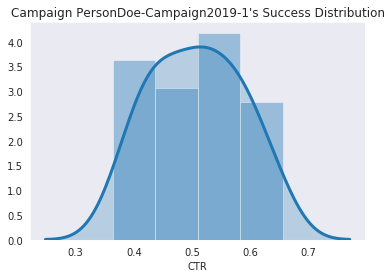

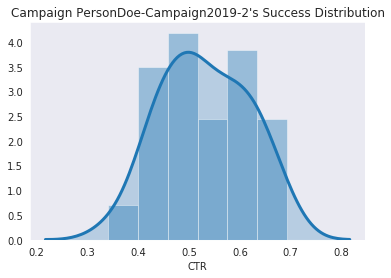

In [14]:
# First Distribution
distribution_plot(series = campaign1, name_of_campaign= campaign1_name)

# Second Distribution
distribution_plot(series = campaign2, name_of_campaign= campaign2_name)

In [15]:
# Proportion Calculations

n1 = (campaign1['No Click'].sum() + campaign1['Click'].sum())
p1 = campaign1['Click'].sum() / n1

n2 = (campaign2['No Click'].sum() + campaign2['Click'].sum())
p2 = campaign2['Click'].sum()  / n2

In [16]:
print(f'Campaign 1: CTR = {p1} and Total Impressions are {n1}')

print(f'Campaign 1: CTR = {p2} and Total Impressions are {n2}')

Campaign 1: CTR = 0.506875 and Total Impressions are 1600.0
Campaign 1: CTR = 0.5275 and Total Impressions are 1600.0


## 3.4 Analyze The Results <span style='color:red'>*</span>

Recall that our test statistic is using the $t$ statistic defined as 

$t= \tfrac{ \hat{p_1} - \hat{p_2} - 0 }{SE}$, 

where the standard error $SE = \sqrt{(\tfrac{\hat{p_1} (1-\hat{p_1})}{n_1}) + (\tfrac{\hat{p_2} (1-\hat{p_2})}{n_2})}$

> Note: When comparing between two groups, the notation $d:=\hat{p_1} - \hat{p_2}$ is introduced to simplify formula
> This is considered a independent t-test with equal variance, and not a dependent t-test w or without equal metrics

Moreover, our degrees of freedom for these two variants is defined as $DoF := (n_1 + n_2 -2)$

### 3.4.1 Manual Approach

For the following function, calculate the difference d, standard error, and t-statistic

In [17]:
def ind_t_test(group1,group2, alpha, output_bool=False, state_conclusion =False, express=False):
    
    # Proportion Calculations.
    n1 = (group1['No Click'].sum() + group1['Click'].sum())
    p1 = group1['Click'].sum() / float(n1)

    n2 = (group2['No Click'].sum() + group2['Click'].sum())
    p2 = group2['Click'].sum()  / float(n2)
    
    d= (p2-p1)
    
    # Standard Error of Proportions Calculations.
    
    ## Term 1
    ### Calculate the first term p_1 * (1-p_1) /n_1
    se1 = (p1 * (1- p1))/n1

    ## Term 2
    ### Calculate the first term p_2 * (1-p_2) /n_2
    se2 = (p2 * (1- p2))/n2
    
    ##### Terms being squared for final result.
    ####### sqrt( SE_1 + SE_2)
    standardError = np.sqrt(se1 + se2)
    
    
    # T statistic calculation.
    ### d / Standard Error
    tStatistic = (d) / standardError # d-0 is not applied here

    # Degrees of Freedom
    ### (n_1-1) + (n_2-1) = (n_1 + n_2 -2)
    dof = (n1 + n2-2)
    
    
    # Critical T Value Test Statistic
    criticalValue = scipy.stats.t.ppf(1.0 - alpha, df = dof)


    # Confidence Interval
    ### Avoid value of 0 in this CI
    confInt = [d - (criticalValue * standardError), d + (criticalValue * standardError)]

    
    # Second type of decision criteria: |t| >= |t^*|.

    # Two Sided P Value, P( |t| >= |t^*|).
    ### Calcualte the p-value using a Cumulative Density function
    ### from Scipy's stats.t.cdf(t-test, DoF) function
    
    p_val = (1 - scipy.stats.t.cdf(abs(tStatistic), df \
                                   = (n1 + n2-2)) ) * 2.0
    
    if output_bool is True:
        print('Analysis:\n\n')
        print(f'Campaign {group1.Campaign[0]}\'s CTR: {round(p1,4)}' \
              + f' with Standard Error {se1}.')
        print(f'Campaign {group2.Campaign[3]}\'s CTR: {round(p2,4)}' \
              + f' with Standard Error {se2}.\n')
        
        print(f"Confidence Interval {confInt}")
        print(f'T Statistic: {round(tStatistic, 2)}\n')
        
        print(f'We have critical value t^* at {round(criticalValue, 2)}' + \
              f'\nand p-value of {round(p_val, 2)}')
        
        print(f'\n\nComponents for variants Campaign {group1.Campaign[0]}\'s \n& ' + \
              f'Campaign {group2.Campaign[3]}\'s, respectively:')
        
        print(f'Difference d: {d}')
        
        print(f'SE terms within SE calculation: {[se1,se2]}')
        print(f'SE: {standardError}')
        
        print(f'Calcualted T-statistic: {tStatistic}')
        print(f'T critical value: {criticalValue}')
        
    if state_conclusion is True:
        if express is False:
            # Restate our decision process
            print('Conclusion:\n\n')

            print(f'If the p-value is less than our defined alpha = {alpha}, then we' +\
                  ' reject the null hypothesis H_0.\nIf not, then we fail to reject the' +\
                  ' null hypothesis H_0.')

            print(f'Confidence Interval: {confInt}')
            print(f'P-value: {p_val}')
            print(f'Alpha: {alpha}')
        
        if p_val < alpha:
            print('\nWe reject the Null Hypothesis H_0')
            print('Therefore, we can say that there is a statistical ' + \
            'difference between the two campaigns.')

        else:
            print('\nWe fail to reject the Null Hypothesis H_0')
            print('\nTherefore, we can say that there is no statistical' + \
            ' significant difference between the two campaigns.')
    return([p1,p2], [n1,n2], \
           [se1,se2], standardError, \
           tStatistic, criticalValue, \
           confInt, p_val)

If the calculated t-statistic $t$ > critical value $t^*$, then we reject the null hypothesis $H_0$, and accept the alternative hypothesis $H_1$.


> Equivalently, if $p < \alpha$, then we  reject the null hypothesis $H_0$. 

>> P-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming null hypothesis is true.

It does not measure support for alternative hypothesis

If not, then we fail to reject the null hypothesis $H_0$. 

![Sleepy](../Resources/Images/tired_gif.gif)


In [18]:
ctr, samples, \
sample_se, SE, \
tStat, tCrit, \
confidence_interval, p_val = ind_t_test(group1 = campaign1,
                                        group2= campaign2, \
                                        alpha = alpha,\
                                        output_bool=True, \
                                        state_conclusion=True)


Analysis:


Campaign PersonDoe-Campaign2019-1's CTR: 0.5069 with Standard Error 0.00015622045898437502.
Campaign PersonDoe-Campaign2019-2's CTR: 0.5275 with Standard Error 0.00015577734375000002.

Confidence Interval [-0.00843722414201857, 0.04968722414201858]
T Statistic: 1.17

We have critical value t^* at 1.65
and p-value of 0.24


Components for variants Campaign PersonDoe-Campaign2019-1's 
& Campaign PersonDoe-Campaign2019-2's, respectively:
Difference d: 0.020625000000000004
SE terms within SE calculation: [0.00015622045898437502, 0.00015577734375000002]
SE: 0.01766345953471106
Calcualted T-statistic: 1.1676648031190675
T critical value: 1.645330241502658
Conclusion:


If the p-value is less than our defined alpha = 0.05, then we reject the null hypothesis H_0.
If not, then we fail to reject the null hypothesis H_0.
Confidence Interval: [-0.00843722414201857, 0.04968722414201858]
P-value: 0.24302904778167012
Alpha: 0.05

We fail to reject the Null Hypothesis H_0

Therefore, we ca

### 3.4.2 Scipy Approach

We use Scipy's [Independent T-Test](https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L3114) with with an assumed equal variance between both samples.

In [19]:
# Try out the Independent T-Test w/Equal Variance function from Scipy's 
# stats.ttest_ind(group 1, group 2, equal_var = ?)

tTest_statistic, tTest_pval = scipy.stats.ttest_ind(campaign2['CTR'], \
                                                    campaign1['CTR'], \
                                                    equal_var = True)
print(f'Scipy\'s Calculated t-statistic is {round(tTest_statistic,2)}' + \
      f' and p-value is {tTest_pval}')

Scipy's Calculated t-statistic is 1.4 and p-value is 0.16502312067142305


That's it, that's the test.

![Awk](../Resources/Images/awkward_meme.png)

Oh, but we should still respectively state our conclusion (for respect of the test)...

In [20]:
if tTest_pval < alpha:
    print('\nWe reject the Null Hypothesis H_0')
    print('Therefore, we can say that there is a statistical ' + \
    'difference between the two campaigns.')

else:
    print('\nWe fail to reject the Null Hypothesis H_0')
    print('\nTherefore, we can say that there is no statistical' + \
    ' significant difference between the two campaigns.')


We fail to reject the Null Hypothesis H_0

Therefore, we can say that there is no statistical significant difference between the two campaigns.


However, notice the slight differences between the manual approach and the Scipy approach.
There may be some error in setup, rounding, or another type of error in the Manual approach, most likely!

With that being said, remember...


![Always be Testing](../Resources/Images/always_be_testing.png)


Or to others...

![A/B testing, here we go again](../Resources/Images/here_we_go_again.png)


# 4.0 Remarks and Considerations <span style='color:red'>*</span>

## 4.1 P-Hacking

* Be weary on being incentivized to prove something is different
    * Don't shape results, after the fact
* During the test
    * Don't peek
        * Avoid t-test timelines, though some companies may have that option
    * Refrain from stopping test at point of first statistical difference result

## 4.2 Sample Size Matters

Here’s how small effect sizes can still produce tiny p-values:

You have a very large sample size. As the sample size increases, the hypothesis test gains greater statistical power to detect small effects. With a large enough sample size, the hypothesis test can detect an effect that is so miniscule that it is meaningless in a practical sense.

The sample variability is very low. When your sample data have low variability, hypothesis tests can produce more precise estimates of the population’s effect. This precision allows the test to detect tiny effects.

## 4.3 Interpreting the probability $\alpha$

In [21]:
# Demo on Alpha value

for i in range(10):
    expressCamp1, expressCamp2 = express_campaign_df_generator([campaign1_name,campaign2_name], \
                                      weightMatrix = [[.5, .5],[.53, .47]],\
                                      sample_size = 3000)
    ind_t_test(group1 = expressCamp1, \
               group2 = expressCamp2, \
               alpha=0.05, \
               output_bool=False, \
               state_conclusion=True, \
              express = True)


We fail to reject the Null Hypothesis H_0

Therefore, we can say that there is no statistical significant difference between the two campaigns.

We fail to reject the Null Hypothesis H_0

Therefore, we can say that there is no statistical significant difference between the two campaigns.

We fail to reject the Null Hypothesis H_0

Therefore, we can say that there is no statistical significant difference between the two campaigns.

We reject the Null Hypothesis H_0
Therefore, we can say that there is a statistical difference between the two campaigns.

We reject the Null Hypothesis H_0
Therefore, we can say that there is a statistical difference between the two campaigns.

We fail to reject the Null Hypothesis H_0

Therefore, we can say that there is no statistical significant difference between the two campaigns.

We reject the Null Hypothesis H_0
Therefore, we can say that there is a statistical difference between the two campaigns.

We reject the Null Hypothesis H_0
Therefore, we ca

## 4.4 Practical vs Significance

Statistical significance indicates only that you have sufficient evidence to conclude that an effect exists. It is a mathematical definition that does not know anything about the subject area and what constitutes an important effect.

## 4.5 Central Limit Theorem

The Central Limit Theorem (CLT) implies a sample of independent random variables, their sums tends towards to a normal distribution even if the original variables themselves aren't normally distributed, also the sample mean tends towards to a normal distribution (sum and mean are equivalent).


That is, For large values of n, the distributions of the count $X$ and the sample proportion are approximately normal due to the Central Limit Theorem, as it approximates the normal distribution like 

$\bar{X}$ ~ $N(\tfrac{np}{p},\tfrac{np(1-p)}{n^2}) = N(n, \tfrac{p(1-p)}{n})$

## 4.6 More on timing

* When is the best time to run the experiment? (e.g. running on Holidays, weekends, weekdays, etc?)
* If there is a new change, there may be a learning effect, and then behaviour can become stable again (leading to a false positive)
    * Recommendation to avoid a Learning Effect is running experiment on smaller group of users for an extended time period.
    
## 4.7 More on Simpson's Paradox
 
 
* Mind the possibility of the Simpson's Paradox
    * Segmentation of groups in thus reducing sampling creates significance, but not from other groups from data before segmentation. Best way to validate this doesn't exist is to do the same test for combined groups.
        * E.g. Splitting between new users and existing users
* $\alpha$ percent of the time, you'll reach significance due to chance 
    * You are running a tests with 20 variants, and you test each hypothesis separately:
        * P(one significant result) = 1−P(no significant results) 
        * P(one significant result) = 1−(1−0.05)^20 = 0.64
    * Avoid this by the Bonferroni Correction

## 4.8 On the note of the Decision Tree image...

Differences between z & t tests:

* z-test: A z-test assumes observations are independently drawn from Normal Distribution with unknown mean and known variance. Z-test is used when we have quantitative data.

* t-test: a t-test assumes observations are independently drawn from Normal distribution with unknown mean and unknown variance. With a t-test, we do not know the population variance.

## 4.9 Other

* Ethics
    * Do your users know about being tested on?
    * Privacy concerns 
    * Post-testing effects on participants
        * IRB (Institutional Review Board) is not necessary unless farmful actions happen to test participants
        * Formal and regulated tests require knowledge of privacy, choice, risk, and informed consent
    
    
* Novelty Effect or Change Aversion: Post-test Cohort analysis may be helpful in evaluation if testing was valid for users, after some timeframe after the test.

### 4.9.1 Other: Welche's T-test (T test with unequal variance or observations)

Equal or unequal sample sizes, unequal variances
This test, also known as Welch's t-test, is used only when two population variances are not assumed to be equal (the two sample sizes may or may not be equal) and hence must be estimated seperately. The t-stat to test whether population means are different is

$t= \tfrac{\bar{X}_1 - \bar{X}_2}{s_{\bar{\Delta}}}$

where $s_{\bar{\Delta}} = \sqrt{\tfrac{s^2_1}{n_1} + \tfrac{s^2_2}{n_2}}$

d.f. = $\tfrac{(\tfrac{s^2_1}{n_1} + \tfrac{s^2_2}{n_2})^2}{\tfrac{(\tfrac{s^2_1}{n_1})^2}{n_1 - 1} + \tfrac{(\tfrac{s^2_2}{n_2})^2}{n_2 - 1}}$

This d.f. is known as the Welch-Satterthwaite equation.

<a id='appendix-chi-square-test'></a>



# 5.0 The Chai-err umm....Chi-Squared Test! [Optional]


## 5.1 $\chi^2$ Testing [Optional]


* Chi-Square Goodness of Fit Test
    * $\chi^2$ Test that determines if a sample data matches a population. For more details on this type, see: Goodness of Fit Test.

* Chi-Square Test for Independence

    * $\chi^2$ Test that compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
    
> Note: Chi Square is cool because it works with more than 2 samples

> Note: If we have a  small sample size, then Chi Square may have more errors, and thus one would have to work with a Fischer's Exact Test




## 5.2 Applying the $\chi^2$ Test 

### 5.2.1 The Manual Approach
Equivalently, we can use a similiar process and test statistic in evaluation of proportions, seen in section 3.0+. 

Let us have a 2x2 frequency table where columns are two groups of respondents and rows are the two responses "Clicks" (our successes) and "No Clicks". 


|    _    | Click | No Click | 
|--------|--------|-------------|
| Test 1 | X_1    | Y_1         |
| Test 2 | X_2    | Y_2         |
| Total  | x      | x           | 

State the Hypothesis:

$H_0: \bar{p_1} - \bar{p_2} = 0$ 

$H_1: \bar{p_1} - \bar{p_2} \neq 0$

Degrees of freedom = $(x_1 - 1) * (x_2 - 1)$

Test Statistic:

$\chi^2= \tfrac{(O-E)^2}{E}$, 

where $O$ are the Observed values and $E$ are the Expected values.

> Note:
Expected values are calculated as such:
> For the top left region, it would be $\tfrac{( x_{Clicks} * (X_1 + Y_1)}{x_T }$

|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | $Y_1$    | $Y_1$         | $X_1 + Y_1$  | 
| Test 2 | $X_2 $   | $Y_2 $        | $X_2 + Y_2 $  |
| Total  | $x_{Clicks}$      | $x_{No Clicks}$        | $x_T$   | 

In [22]:
df = [ [campaign1['Click'].sum(), \
        campaign1['No Click'].sum(),\
        campaign1['No Click'].sum()+campaign1['Click'].sum()], \
      [campaign2['Click'].sum(), \
       campaign2['No Click'].sum(), \
        campaign2['No Click'].sum()+campaign2['Click'].sum()] ]


In [23]:
twoByTwo_df = pd.DataFrame(df,index=['Campaign 1', 'Campaign 2'] ,\
                           columns=['Click','No Click','Impressions'])

In [24]:
twoByTwo_df

,Click,No Click,Impressions
Campaign 1,811.0,789.0,1600.0
Campaign 2,844.0,756.0,1600.0


In [25]:
expectedClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['Click'].sum() 

expectedNonClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['No Click'].sum() 

expectedDf = pd.concat([expectedClicksSeries,expectedNonClicksSeries],axis=1)

In [26]:
expectedDf.columns =['Click', 'No Click']
expectedDf


,Click,No Click
Campaign 1,827.5,772.5
Campaign 2,827.5,772.5


In [27]:
chiSquareStatistic = ((twoByTwo_df[['Click','No Click']]-expectedDf)**2 / expectedDf).values.sum()

In [28]:
chiSquareStatistic

1.3628604112281113

### 5.2.2 The SciPy Approach

In [33]:
chiSquareStat, pVal, dof, expected = scipy.stats.chi2_contingency(twoByTwo_df)

print('Expected Table: \n',expected,'\n')

# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob

criticalVal = scipy.stats.chi2.ppf(prob, dof)

print(f'Degrees of Freedom: {dof}\n')
print('probability=%.2f, critical=%.2f, stat=%.2f \n' % (prob, criticalVal, alpha))

print('Decision:')
print(f'For significance level {round(alpha,2)},\n')

if abs(chiSquareStat) >= criticalVal:
    print('We reject the Null Hypothesis, H_0\n')
    print(f'for p = {prob} >= {criticalVal}.')
else:
    print('We fail to reject the Null Hypothesis, H_0\n')
    print(f'for p = {prob} < {criticalVal}.')

    
### Alternatively can say:    
# if p <= alpha:
#     print('We reject the Null Hypothesis, H_0.')
#     print(f'for p = {p} >= {alpha}.')

# else:
#     print('We fail to reject the Null Hypothesis, H_0.')
#     print(f'for p = {p} < {alpha}.')

Expected Table: 
 [[ 827.5  772.5 1600. ]
 [ 827.5  772.5 1600. ]] 

Degrees of Freedom: 2

probability=0.95, critical=5.99, stat=0.05 

Decision:
For significance level 0.05,

We fail to reject the Null Hypothesis, H_0

for p = 0.95 < 5.991464547107979.


# 6.0 Resources

* https://byrony.github.io/understanding-ab-testing-and-statistics-behind.html
    
* https://www.dataquest.io/blog/a-b-testing-the-definitive-guide-to-improving-your-product/

* https://docs.google.com/presentation/d/1k_zR5IkHaIpA6fbTDoa48Gh_LodY7Mjbf56zLro5Uus/edit#slide=id.g31d3c8507d_0_177
        
        
* https://stats.stackexchange.com/questions/76875/what-is-the-difference-between-mcnemars-test-and-the-chi-squared-test-and-how/141450#141450

* https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L3114

* https://help.optimizely.com/Analyze_Results/How_long_to_run_an_experiment#Baseline_Conversion_Rate

* [“Ignorance more frequently begets confidence than does knowledge”](https://www.goodreads.com/quotes/24141-ignorance-more-frequently-begets-confidence-than-does-knowledge-it-is)

* https://blog.twitter.com/engineering/en_us/a/2016/power-minimal-detectable-effect-and-bucket-size-estimation-in-ab-tests.html

* https://stackoverflow.com/questions/1720421/how-do-i-concatenate-two-lists-in-python
